In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [19]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
#FOLDER names are CLASS names

In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset) #every element in the dataset is the batch of 32 images

68

In [7]:
68*32 

2176

In [8]:
for image_batch, label_batch in dataset.take(1):  #This method creates a new dataset that contains only the first element from the original dataset. Here, it's taking the first batch.
    print(image_batch.shape) # ( number of images in the batch, height of each image, width of each image, number of color channels )
    print(label_batch.numpy()) # These are the label values for the batch

(32, 256, 256, 3)
[1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 2 1 1 0 1 0 0 0 0 0 0 1 0 2 1 0 0]


In [ ]:
#So, in each image of the batch, there are 256x256 pixels, and each pixel has three values representing the intensity of red, green, and blue. 

In [ ]:
# To print the numerical values of the pixels in the first image of your image_batch, you can use numpy() to convert the TensorFlow tensor to a NumPy array
# The first_image will be a NumPy array, and print(first_image) will print the numerical values of the pixels in the first image.

# DATA VISUALIZATION

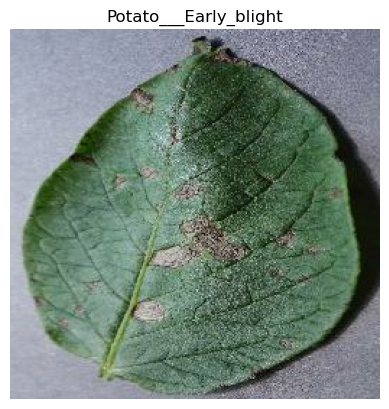

In [17]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")   

In [ ]:
"""
Line 17 explanation: This line iterates over the elements of the dataset, but it only takes the first element due to take(1). 
In each iteration, image_batch contains a batch of images, and label_batch contains the corresponding labels.

This line uses plt.imshow() to display the image. It converts the TensorFlow tensor image_batch[0] to a NumPy array using
numpy(). The astype("uint8") is used to ensure that the pixel values are interpreted as unsigned 8-bit integers, which is 
the expected format for image data.

Here we sets the title of the plot using plt.title(). It retrieves the corresponding class name from the class_names
dictionary (or list) based on the label of the first image in the batch (label_batch[0]).
"""

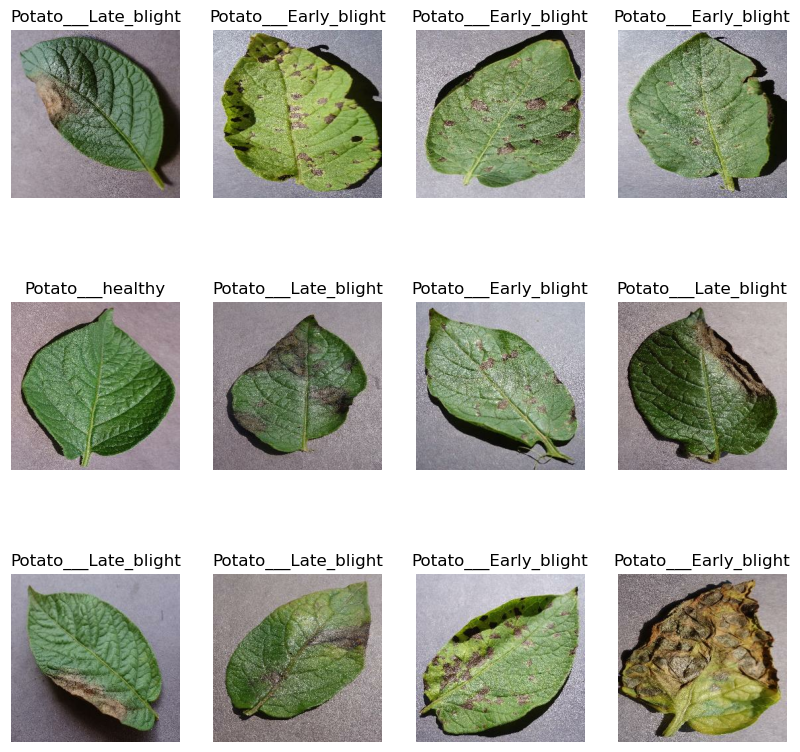

In [18]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")  

# Train Validate Test Split

In [ ]:
"""
80% ==> training
20% ==> 10% validation, 10 % test
"""

In [20]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [22]:
train_Ds = dataset.take(54) #taking the first 54 elements from the original dataset using take(54)
len(train_Ds)

54

In [23]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [24]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [25]:
val_ds = test_ds.take(6) #validation dataset
len(val_ds)

6

In [26]:
test_ds = test_ds.skip(6) #testing dataset
len(test_ds)

8

In [29]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1 , test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12) 
        
    train_size = int(train_split * ds_size)
    
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [30]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [31]:
len(train_ds)

54

In [32]:
len(val_ds)

6

In [33]:
len(test_ds)

8

In [ ]:
#seed=12 initializes the random number generator with the seed value of 12. If you use the same seed elsewhere in your code or share it with others, they should get the same shuffling order when shuffling is applied.

In [34]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
"""
train_ds.cache():

cache() is used to cache the elements of the dataset in memory or on disk.
This can significantly speed up training, especially when working with complex input pipelines or
when the dataset doesn't fit into memory. Caching is most effective when the dataset doesn't change between epochs.

.shuffle(10000):

shuffle(10000) shuffles the elements of the dataset with a buffer size of 10,000.
The buffer size determines the number of elements from the dataset that the shuffle operation uses to
randomly sample and create a shuffled batch. A larger buffer size generally leads to a more thorough shuffling
but requires more memory.

.prefetch():

prefetch() is used to prefetch a certain number of batches (or elements) from the dataset to accelerate training.
Prefetching allows the model to start processing the next batch while the current batch is being used for training. 
This can lead to more efficient use of system resources and reduced training time.

tf.data.AUTOTUNE lets TensorFlow automatically determine the optimal buffer size based on available system resources.

"""

 # Data Augmentation 

In [36]:
resize_and_rescale = tf.keras.Sequential( [
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
"""
Resizing Layer:

The Resizing layer is used to resize the input images to a specific target size. 
It resizes the images to IMAGE_SIZE x IMAGE_SIZE.

Rescaling Layer:

The Rescaling layer is used to rescale the pixel values of the images.
It rescales the pixel  values by dividing them by 255, effectively bringing them into the range [0, 1].
"""

In [38]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
"""
RandomFlip("horizontal_and_vertical"):

The RandomFlip layer is used for random horizontal and vertical flipping of input images. The argument "horizontal_and_vertical" specifies that flipping can occur along both the horizontal and vertical axes.

RandomRotation(0.2):

The RandomRotation layer is used for random rotations of input images. The argument 0.2 specifies the maximum angle of rotation in radians. In this case, images can be randomly rotated by up to 0.2 radians (which is approximately 11.46 degrees).

"""